Shape of cleaned dataset: (1460, 250)
Training set: (1168, 249) Validation set: (292, 249)

Linear Regression RMSE: 52543.86769963547
Random Forest RMSE: 30472.810509288545


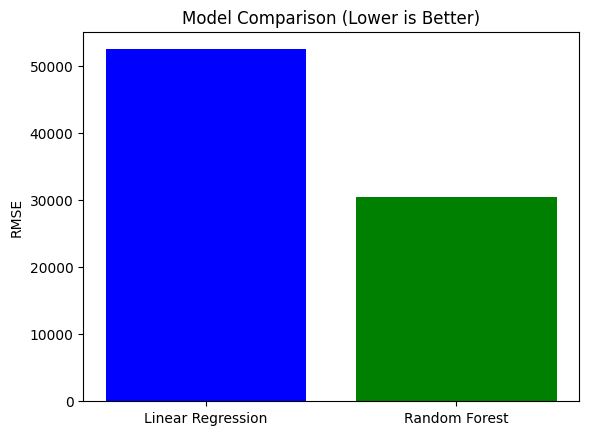

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ======================
# 1) Load cleaned dataset
# ======================
df = pd.read_csv("../data/train_cleaned.csv")

print("Shape of cleaned dataset:", df.shape)

# ======================
# 2) Define features (X) and target (y)
# ======================
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, "Validation set:", X_val.shape)

# ======================
# 3) Linear Regression
# ======================
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_val)
rmse_lin = np.sqrt(mean_squared_error(y_val, y_pred_lin))

print("\nLinear Regression RMSE:", rmse_lin)

# ======================
# 4) Random Forest Regressor
# ======================
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

print("Random Forest RMSE:", rmse_rf)

# ======================
# 5) Compare results
# ======================
models = ["Linear Regression", "Random Forest"]
rmse_scores = [rmse_lin, rmse_rf]

plt.bar(models, rmse_scores, color=["blue", "green"])
plt.ylabel("RMSE")
plt.title("Model Comparison (Lower is Better)")
plt.show()
